In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file_path = "C:/Users/thege/OneDrive/Escritorio/IH/Week 5/amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [4]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [5]:
from scipy.stats.contingency import association
association(crosstab_result, method="cramer")

0.1222829439760564

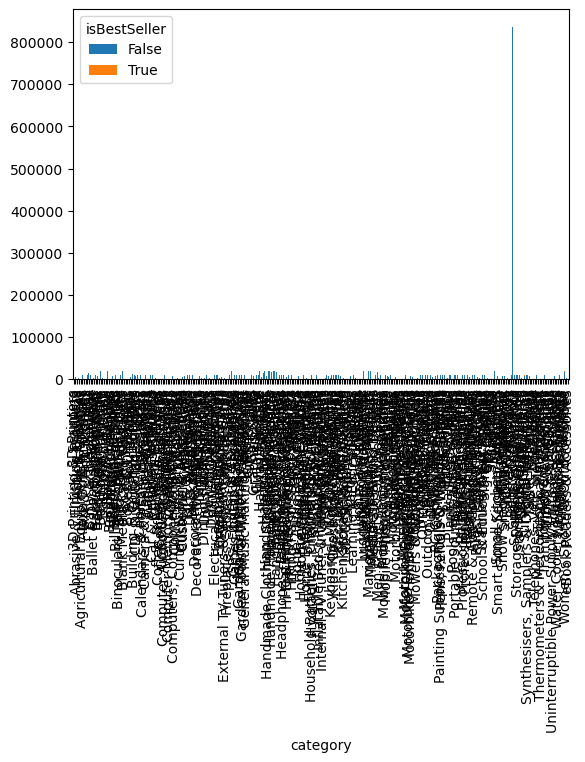

In [6]:
crosstab_result.plot(kind="bar", stacked=True);

In [7]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers

In [8]:
# Example usage:
data_series = df['price']  
outliers = tukeys_test_outliers(data_series)
print(outliers)

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


In [9]:
# Your code goes here
data_series = df['price']  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series)
print(outliers)
df.iloc[~outliers.index,:] # ~ = NOT

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2443640,2828581,B0BX2KM9KQ,Motorcycle Socks 2 Pairs I'd Rather be on My M...,0.0,0,10.99,False,0,Motorbike Clothing
2443631,2828572,B01N1GW57Z,WULFSPORT LINEAR MOTORBIKE KIDS RACE SUIT New ...,5.0,4,60.62,False,0,Motorbike Clothing
2443625,2828566,B095K5HFZ7,SHIMA SX-2 EVO LADY Motorbike Shoes for Women ...,4.6,170,99.95,False,0,Motorbike Clothing
2443622,2828563,6040458925,starlingukpk Quality Flexible Motorbike Motorc...,4.2,2,9.99,False,0,Motorbike Clothing
2443619,2828560,B07JLZB7YY,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing
...,...,...,...,...,...,...,...,...,...
31,32,B08MQRDDYB,"Echo Show 15 | Full HD 15.6"" smart display wit...",4.4,2616,199.99,False,0,Hi-Fi Speakers
23,24,B09HGRXXTM,JBL Flip 6 Portable Bluetooth Speaker with 2-w...,4.7,8700,98.95,False,0,Hi-Fi Speakers
12,13,B09ZXDMNCY,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


<Axes: xlabel='price', ylabel='category'>

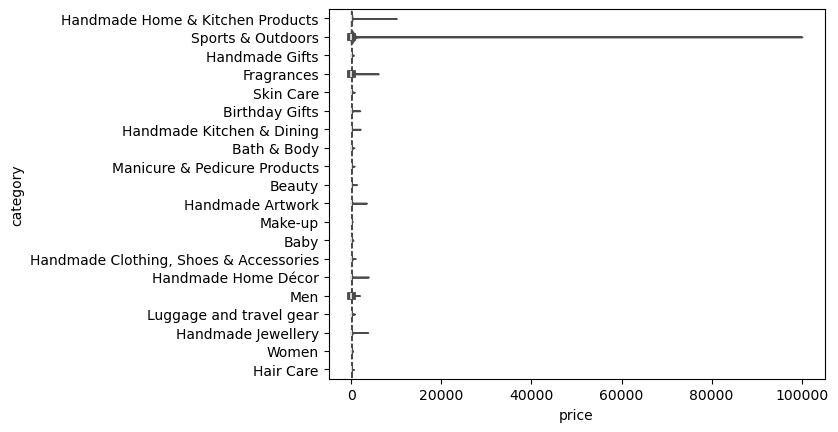

In [16]:
# Plotting a violin plot to visualize the distribution of 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
sns.violinplot(data=filtered_df, y='category', x='price', palette="coolwarm", hue='category', legend=False)

In [13]:
a=df['category'].value_counts()
top_20_categories = a.nlargest(20).index
filtered_df = df[df['category'].isin(top_20_categories)]

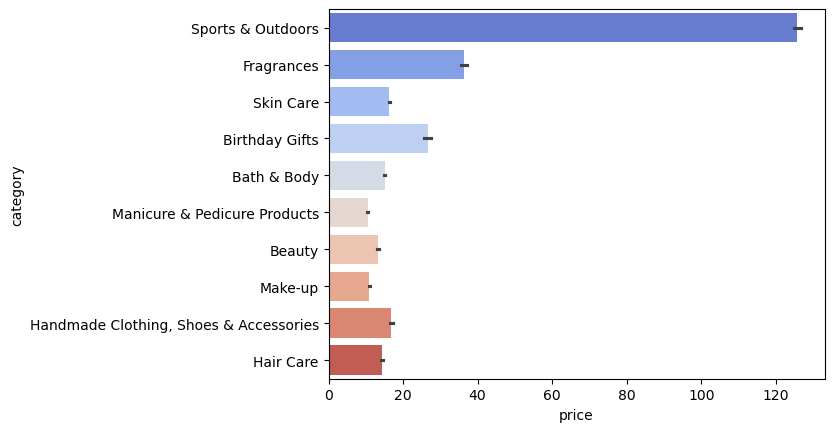

In [20]:
# Plotting a bar plot to visualize the average 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
sns.barplot(data=filtered_df2, y='category', x='price', palette="coolwarm", hue='category', legend=False);

In [17]:
b=df['category'].value_counts()
top_10_categories = b.nlargest(10).index
filtered_df2 = df[df['category'].isin(top_10_categories)]

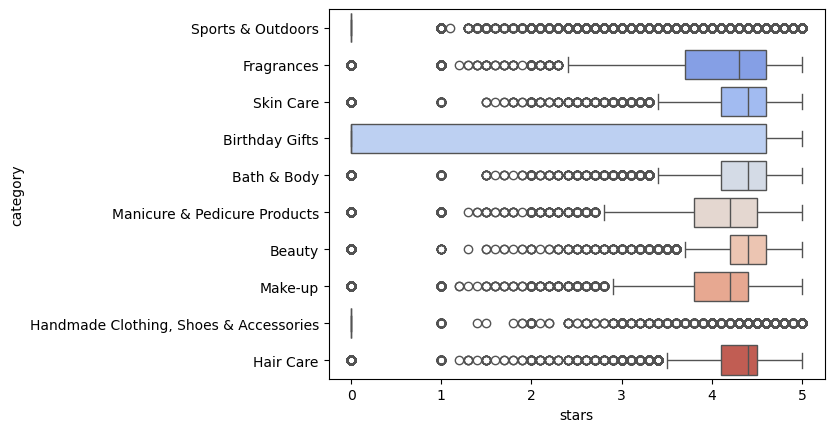

In [24]:
# Plotting a box plot to visualize the spread and outliers of 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
sns.boxplot(data=filtered_df3, y='category', x='stars', palette="coolwarm", hue='category', legend=False);

In [22]:
c=df['category'].value_counts()
top_10_categories2 = c.nlargest(10).index
filtered_df3 = df[df['category'].isin(top_10_categories2)]

In [25]:
# Calculating the Pearson correlation coefficient between 'SalePrice' and 'GrLivArea' columns
correlation = df['price'].corr(df['stars'])
correlation

-0.1249067326214861

<Axes: xlabel='price', ylabel='stars'>

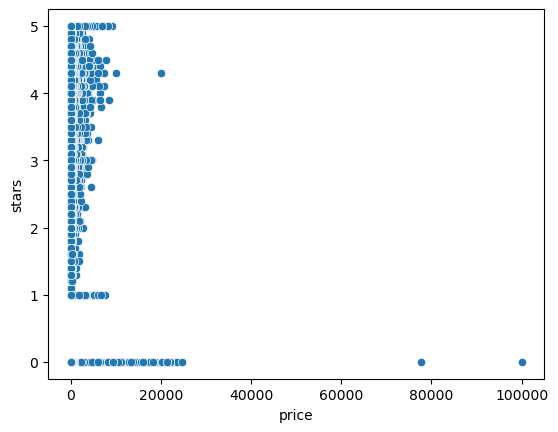

In [26]:
sns.scatterplot(data=df, x='price', y='stars')

In [28]:
# Remember to adjust the threshold (in this case, < 20) based on your dataset's specific characteristics and domain knowledge.
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]

In [29]:
# Extracting columns with object (typically string) data types to create a categorical dataframe
# For demonstration purposes, let's consider the columns in potential_categorical_from_numerical as categorical variables.
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

# Adjusting the numerical dataframe by removing the moved columns
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

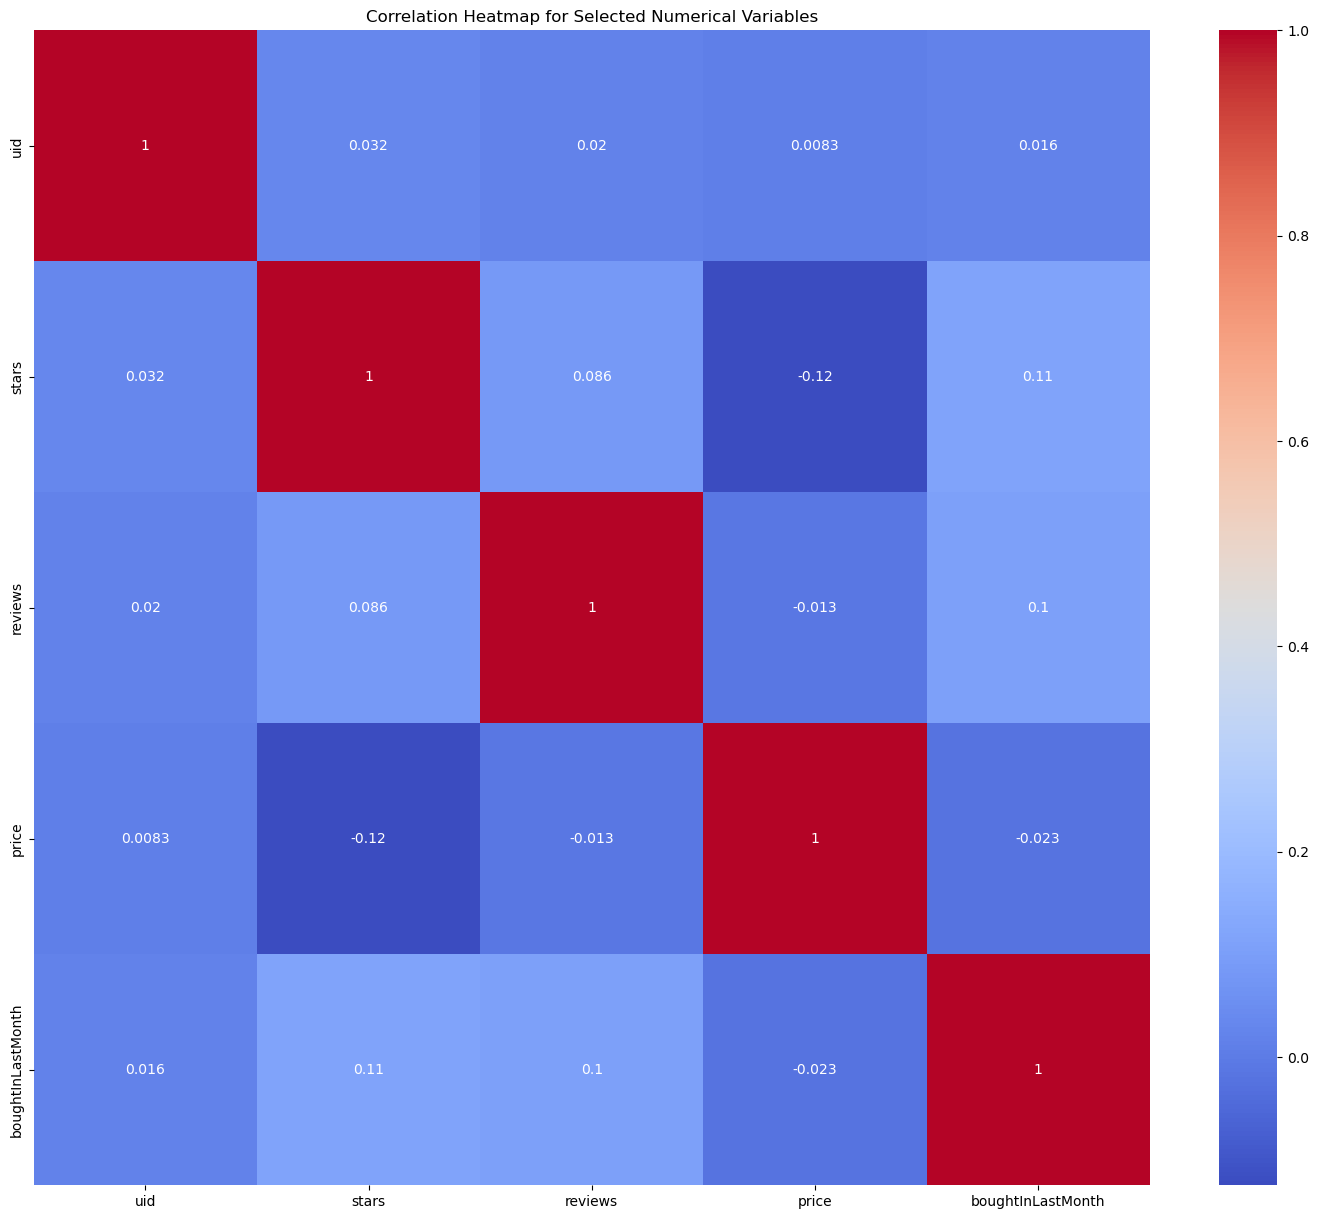

In [30]:
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

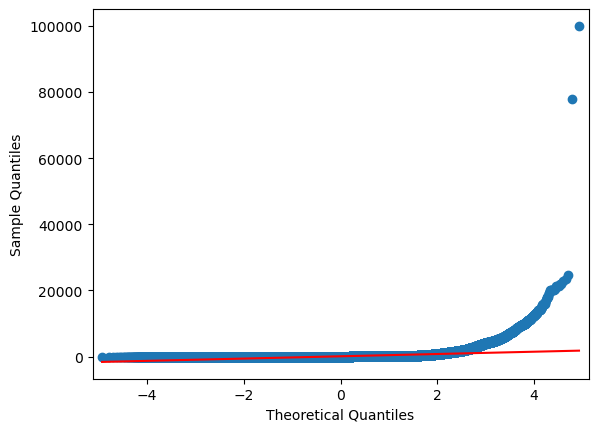

In [31]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'SalePrice' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s');